## Introduction


* Author: Qi Liu
* Date: 2024.03.27

Creating a dendrogram based on a distance matrix using hierarchical clustering

In [2]:
# install.packages("ape")

In [3]:
list.files()

[1] "demo_tree.txt"            "demo_tree2.txt"          
 [3] "ete3_get_start.ipynb"     "FtsZ inhibitor .xlsx"    
 [5] "FtsZ_inhibitor.csv"       "FtsZinhibitor.csv"       
 [7] "matrix_of_jinglan_v2.csv" "R_Dendrogram.ipynb"      
 [9] "R_TreeMap.html"           "R_TreeMap.r"             
[11] "Similarity-Copy1.ipynb"   "Similarity.ipynb"

In [7]:
# Define a function that accepts the number of clusters k and plots the dendrogram
plot_dendrogram_with_colors <- function(
    dm, 
    k=4,
    method = "complete",
    type="phylogram",
    cex = 1, 
    label_offset = 0.02
) {
  # Convert dm to a dist object if it is not already
  if (!inherits(dm, "dist")) {
    dm_dist <- as.dist(as.matrix(dm))
  } else {
    dm_dist <- dm
  }

  # Compute the hierarchical clustering using the dist object
  hc <- hclust(dm_dist, method = method)

  # Determine cluster membership for each item
  clusters <- cutree(hc, k)

  # Generate k distinct colors
  colors <- rainbow(k)

  # Map the clusters to colors
  cluster_colors <- colors[clusters]

  # Load the 'ape' package; install it if necessary with install.packages("ape")
  library(ape)
    
  # Convert hc to class phylo
  phylo_tree <- as.phylo(hc)
 
  # Plot the tree with type "radial"
  if (type == "radial") {
    par(mar=c(1,1,1,1)+0.1)  # Adjust the margin to make sure there is space for labels
    plot(phylo_tree, type=type, tip.color=cluster_colors, cex = cex, label.offset = label_offset)

    # Optionally, you can add another plotting line to display the labels
    # with more control and customization, e.g.:
    add.phylo.labels(phylo_tree, all=TRUE, cex=cex, align=TRUE)
  } else {
    # For other plot types
    plot(phylo_tree, type=type, tip.color=cluster_colors, cex = cex, label.offset = label_offset)
  }       
}

## FtsZ inhibitor

In [5]:
list.files()

[1] "demo_tree.txt"            "demo_tree2.txt"          
 [3] "ete3_get_start.ipynb"     "FtsZ inhibitor .xlsx"    
 [5] "FtsZ_inhibitor.csv"       "FtsZinhibitor.csv"       
 [7] "matrix_of_jinglan_v2.csv" "R_Dendrogram.ipynb"      
 [9] "R_TreeMap.html"           "R_TreeMap.r"             
[11] "Similarity-Copy1.ipynb"   "Similarity.ipynb"

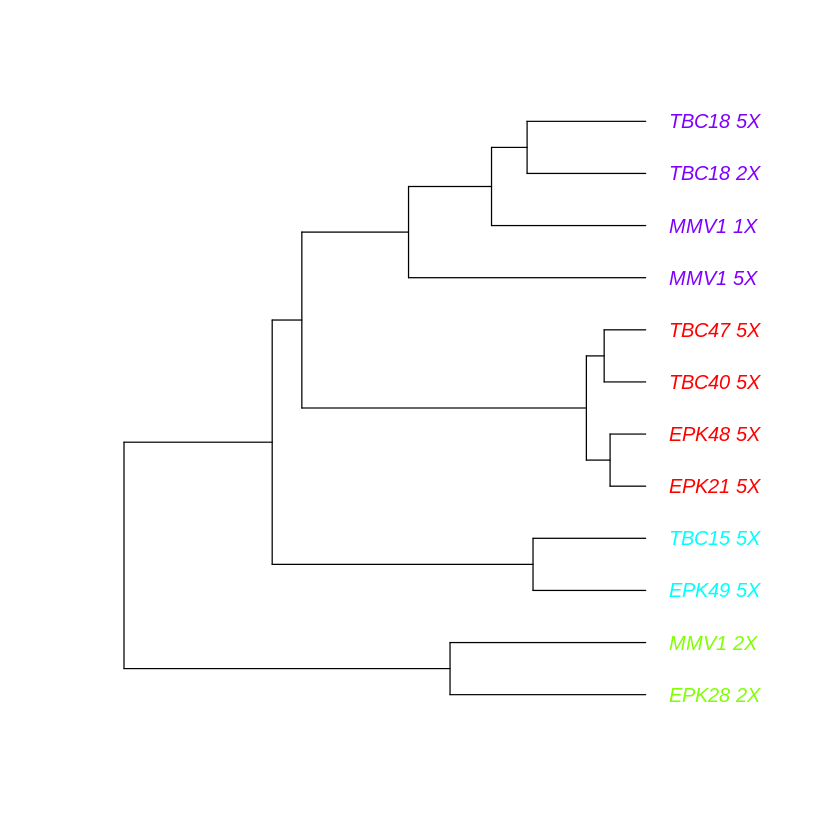

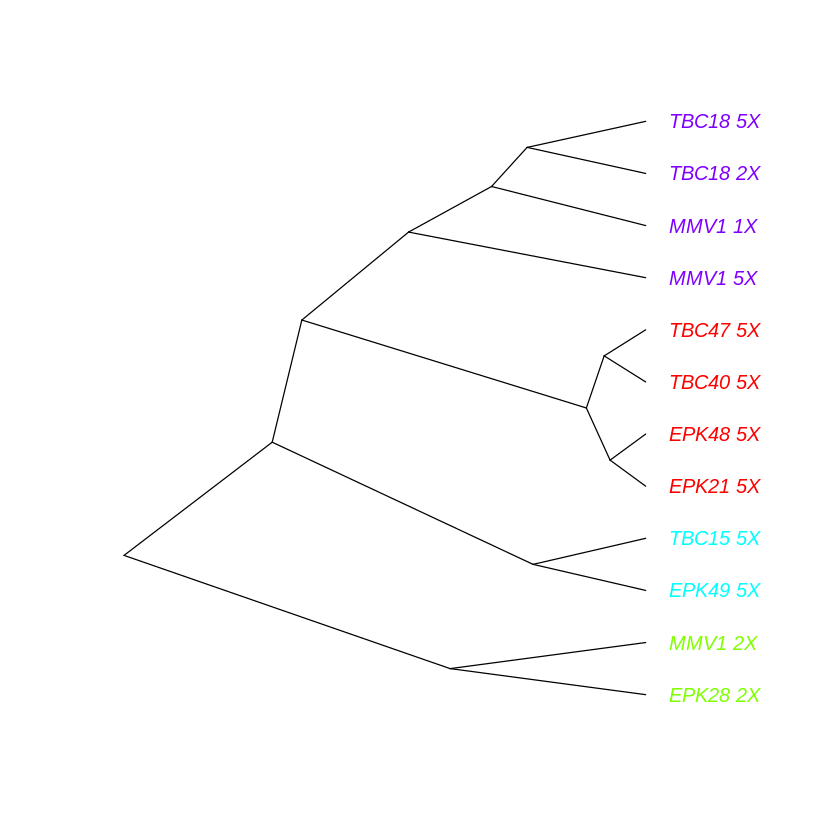

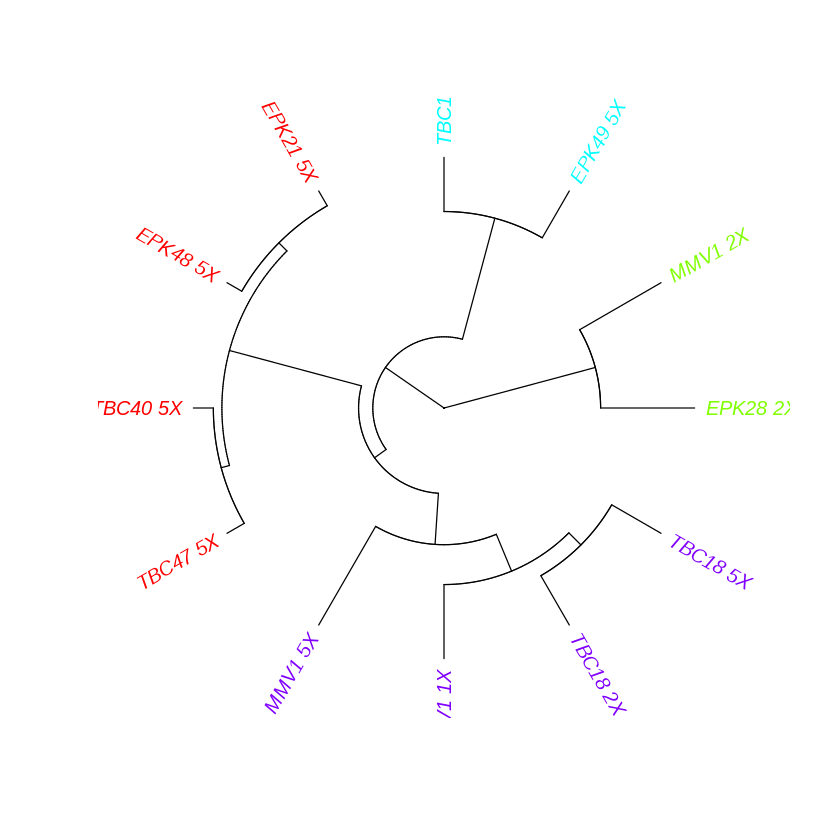

In [8]:
# Read the input data from a CSV file
similarity_matrix <- read.csv(file="FtsZ_inhibitor.csv", header=TRUE, sep=",", row.names=1)

# Scaling the similarity matrix to the range of 0 to 1
similarity_matrix_scaled <- similarity_matrix / 100

# Computing the distance matrix by subtracting the scaled similarity from 1
dm <- 1 - similarity_matrix_scaled

# Now call the function with the desired number of clusters
desired_k <- 4 # Replace 4 with your desired number of clusters

plot_dendrogram_with_colors(
    dm, 
    desired_k,
    method = "complete",
    type="phylogram"    
)

plot_dendrogram_with_colors(
    dm, desired_k,
    method = "complete",
    type="cladogram"    
)

plot_dendrogram_with_colors(
    dm, desired_k,
    method = "complete",
    type="fan"    
)

# plot_dendrogram_with_colors(
#     dm, desired_k,
#     method = "complete",
#     type="radial"    
# )

## matrix_of_jinglan_v2

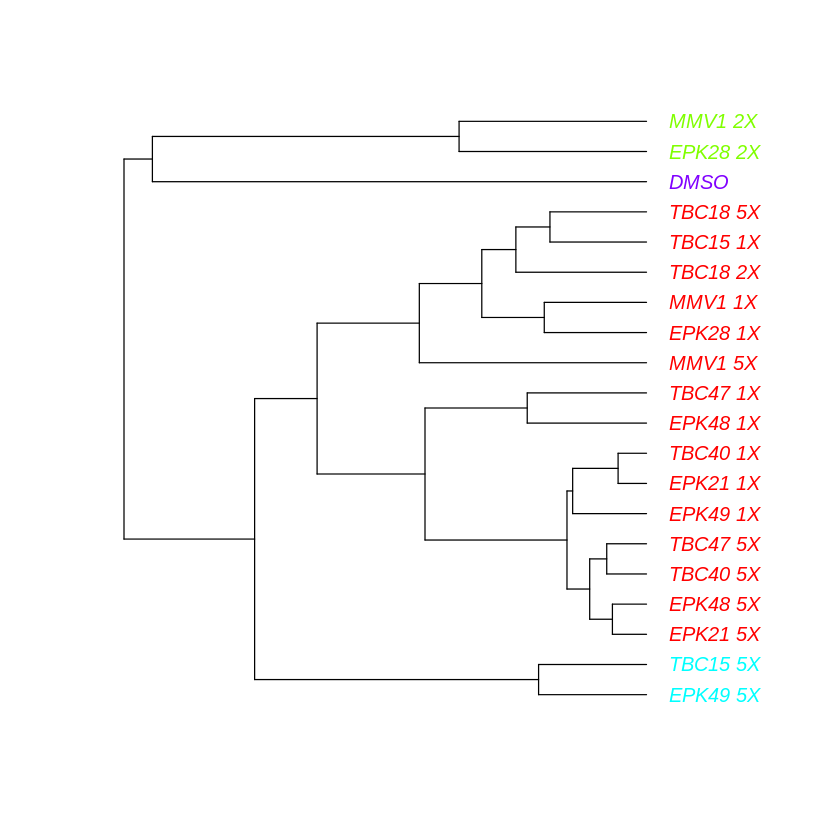

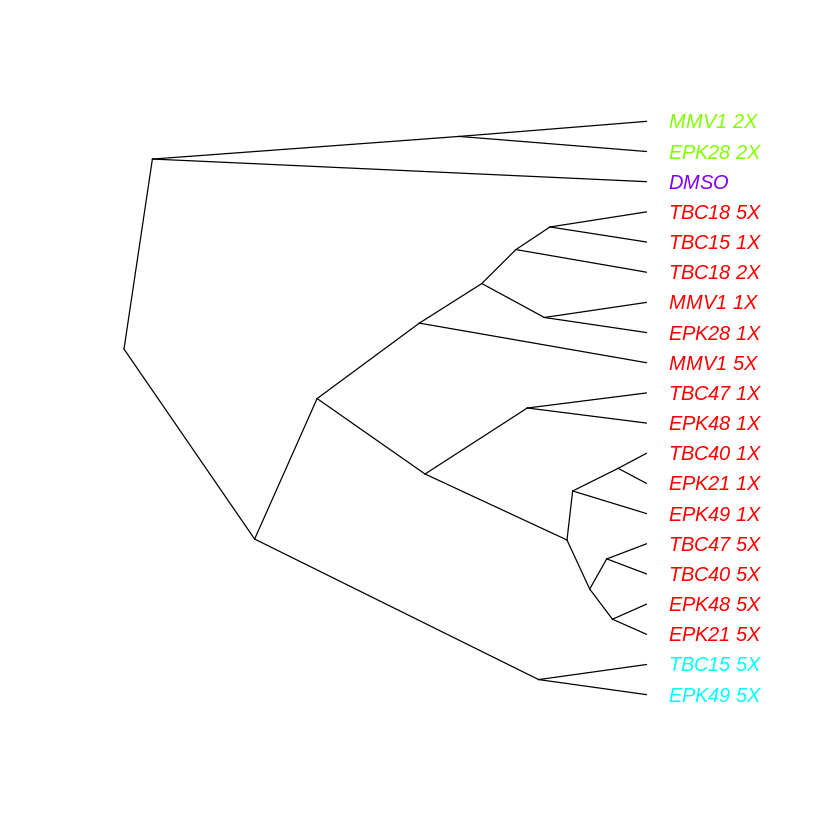

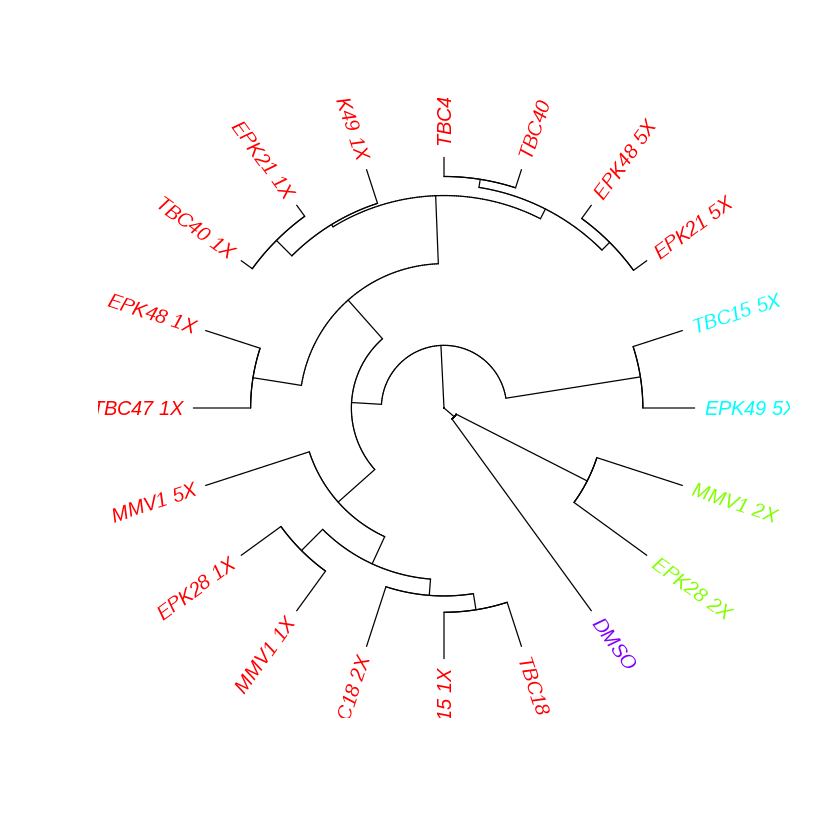

In [9]:
# Read the input data from a CSV file
similarity_matrix <- read.csv(file="matrix_of_jinglan_v2.csv", header=TRUE, sep=",", row.names=1)

# Scaling the similarity matrix to the range of 0 to 1
similarity_matrix_scaled <- similarity_matrix / 100

# Computing the distance matrix by subtracting the scaled similarity from 1
dm <- 1 - similarity_matrix_scaled

# Now call the function with the desired number of clusters
desired_k <- 4 # Replace 4 with your desired number of clusters

plot_dendrogram_with_colors(
    dm, 
    desired_k,
    method = "complete",
    type="phylogram"    
)
plot_dendrogram_with_colors(
    dm, desired_k,
    method = "complete",
    type="cladogram"    
)

plot_dendrogram_with_colors(
    dm, desired_k,
    method = "complete",
    type="fan"    
)


# plot_dendrogram_with_colors(
#     dm, desired_k,
#     method = "complete",
#     type="radial"    
# )

Read more:
* https://www.gastonsanchez.com/visually-enforced/how-to/2012/10/03/Dendrograms/